<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Вводные-данные" data-toc-modified-id="Вводные-данные-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Вводные данные</a></span><ul class="toc-item"><li><span><a href="#Планы-исследования" data-toc-modified-id="Планы-исследования-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Планы исследования</a></span></li></ul></li><li><span><a href="#Загрузка-и-подготовка-данных-к-анализу" data-toc-modified-id="Загрузка-и-подготовка-данных-к-анализу-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка и подготовка данных к анализу</a></span><ul class="toc-item"><li><span><a href="#Промежуточные-выводы" data-toc-modified-id="Промежуточные-выводы-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Промежуточные выводы</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных-(EDA)" data-toc-modified-id="Исследовательский-анализ-данных-(EDA)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных (EDA)</a></span><ul class="toc-item"><li><span><a href="#Промежуточные-выводы" data-toc-modified-id="Промежуточные-выводы-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Промежуточные выводы</a></span></li></ul></li><li><span><a href="#Модель-прогнозирования-оттока-клиентов" data-toc-modified-id="Модель-прогнозирования-оттока-клиентов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Модель прогнозирования оттока клиентов</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Промежуточные-выводы" data-toc-modified-id="Промежуточные-выводы-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Промежуточные выводы</a></span></li></ul></li><li><span><a href="#Разделение-клиентов-на-кластеры" data-toc-modified-id="Разделение-клиентов-на-кластеры-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Разделение клиентов на кластеры</a></span><ul class="toc-item"><li><span><a href="#Промежуточные-выводы" data-toc-modified-id="Промежуточные-выводы-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Промежуточные выводы</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Анализ оттока клиентов из сети фитнес-центров

## Вводные данные

Сеть фитнес-центров разрабатывает новомодную стратегию взаимодействия с клиентами на основе аналитических данных. Наша задача провести анализ и подготовить план действий по удержанию клиентов. Основанием расчетом будут переведенные в электронный вид клиентские анкеты

### Планы исследования

Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. Исследование будет проходить в несколько щагов:
1. Загрузка и первичная обработка и проверка данных
2. Проведение исследовательского анализа данных (EDA)
3. Построение модели прогнозирования оттока клиентов
4. Разделение клиентов на кластеры
5. Формулировка выводов и базовые рекомендации по работе с клиентами (выделить целевые группы клиентов, предложить меры по снижению оттока, определить другие особенности взаимодействия с клиентами)

## Загрузка и подготовка данных к анализу

Загрузим необходимые библиотеки и переданный нам датасет

In [1]:
# импортируем необходимые нам библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
from IPython.display import display, HTML
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans


#введем некотрые настройки
warnings.filterwarnings("ignore")
pd.set_option('max_colwidth', 400)
plt.rcParams.update({'figure.figsize': (15,8)})
pd.options.display.float_format = '{:,.2f}'.format


#Подключим файлы с данными 
try:
    gc = pd.read_csv('/datasets/gym_churn.csv')
except:
    print('файл с данными не подключен')
else:
    print('файл с данными подключен')



файл с данными подключен


Согласно описанию данных предоставленому заказчиком:

Набор данных включает следующие поля:

•	'Churn' — факт оттока в текущем месяце;

Текущие поля в датасете:
Данные клиента за предыдущий до проверки факта оттока месяц:
- 'gender' — пол;
- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
- 'Promo_friends' — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- 'Phone' — наличие контактного телефона;
- 'Age' — возраст;
- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
- 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
- 'Group_visits' — факт посещения групповых занятий;
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.


Проверим полученные данные

In [2]:
print('Таблица gym_churn (сводная информация из карточек клиентов фитнесс-центра)')
#Просмотрим общую информацию о данных

print (' ')
print ('Общая информация о данных')
gc.info()

#Просмотрим данные функцией describle

print (' ')
print ('Описание данных')
display(gc.describe().T)
print (' ')

# Применим случайную выборку данных для первичного ознакомления
# Укажем параметр random_state=42, для сохранения результата при повторных запусках алгоритма, если нам
# вдруг понадобится

print ('Случайная выборка данных')
gc.sample(5, random_state=42).T

Таблица gym_churn (сводная информация из карточек клиентов фитнесс-центра)
 
Общая информация о данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000

,count,mean,std,min,25%,50%,75%,max
gender,"4,000.00",0.51,0.50,0.00,0.00,1.00,1.00,1.00
Near_Location,"4,000.00",0.85,0.36,0.00,1.00,1.00,1.00,1.00
Partner,"4,000.00",0.49,0.50,0.00,0.00,0.00,1.00,1.00
Promo_friends,"4,000.00",0.31,0.46,0.00,0.00,0.00,1.00,1.00
Phone,"4,000.00",0.90,0.30,0.00,1.00,1.00,1.00,1.00
Contract_period,"4,000.00",4.68,4.55,1.00,1.00,1.00,6.00,12.00
Group_visits,"4,000.00",0.41,0.49,0.00,0.00,0.00,1.00,1.00
Age,"4,000.00",29.18,3.26,18.00,27.00,29.00,31.00,41.00
Avg_additional_charges_total,"4,000.00",146.94,96.36,0.15,68.87,136.22,210.95,552.59
Month_to_end_contract,"4,000.00",4.32,4.19,1.00,1.00,1.00,6.00,12.00


 
Случайная выборка данных


,555,3491,527,3925,2989
gender,1.00,0.00,1.00,1.00,1.00
Near_Location,1.00,0.00,1.00,0.00,1.00
Partner,0.00,0.00,0.00,0.00,0.00
Promo_friends,0.00,0.00,0.00,0.00,0.00
Phone,1.00,1.00,1.00,1.00,0.00
Contract_period,6.00,6.00,1.00,1.00,1.00
Group_visits,1.00,0.00,1.00,0.00,0.00
Age,37.00,27.00,25.00,31.00,30.00
Avg_additional_charges_total,205.63,137.37,41.61,9.59,275.27
Month_to_end_contract,5.00,6.00,1.00,1.00,1.00


У нас 4000 записей. В целом данные чистые. Проверим наличие дубликатов и пропусков

In [3]:
# проверим дубликаты и пропуски

print('\033[1m' + 'Количество пропусков:' + '\033[0m')
display(gc.isna().sum())
print('=' * 45)
print()

print('\033[1m' + 'Количество явных дубликатов:' + '\033[0m', 
      gc.duplicated().sum())

Количество пропусков:


gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64


Количество явных дубликатов: 0


В целом данные чистые, но я думаю, что необходимо привести название столбцов к одинаковому виду без заглавных букв. 

In [4]:
# исправим наименование колонок
gc.columns = gc.columns.str.lower()

# проверим результат
print(gc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
near_location                        4000 non-null int64
partner                              4000 non-null int64
promo_friends                        4000 non-null int64
phone                                4000 non-null int64
contract_period                      4000 non-null int64
group_visits                         4000 non-null int64
age                                  4000 non-null int64
avg_additional_charges_total         4000 non-null float64
month_to_end_contract                4000 non-null float64
lifetime                             4000 non-null int64
avg_class_frequency_total            4000 non-null float64
avg_class_frequency_current_month    4000 non-null float64
churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB
None


### Промежуточные выводы

Данные чисты и готовы для анализа.

## Исследовательский анализ данных (EDA)

Посмотрим на датасет, изучим средние значения и стандартные отклонения

In [5]:
#проверим стандартные отклонения
gc.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,"4,000.00",0.51,0.50,0.00,0.00,1.00,1.00,1.00
near_location,"4,000.00",0.85,0.36,0.00,1.00,1.00,1.00,1.00
partner,"4,000.00",0.49,0.50,0.00,0.00,0.00,1.00,1.00
promo_friends,"4,000.00",0.31,0.46,0.00,0.00,0.00,1.00,1.00
phone,"4,000.00",0.90,0.30,0.00,1.00,1.00,1.00,1.00
contract_period,"4,000.00",4.68,4.55,1.00,1.00,1.00,6.00,12.00
group_visits,"4,000.00",0.41,0.49,0.00,0.00,0.00,1.00,1.00
age,"4,000.00",29.18,3.26,18.00,27.00,29.00,31.00,41.00
avg_additional_charges_total,"4,000.00",146.94,96.36,0.15,68.87,136.22,210.95,552.59
month_to_end_contract,"4,000.00",4.32,4.19,1.00,1.00,1.00,6.00,12.00


Мы можем сделать некотрые предварительные выводы:
- у нас примерное гендерное равенство по посетителям
- значительное количество посетителей живет неподалеку от зала
- примерно половина клиентов - сотрудники фирм партнеров
- треть пришли с друзьями
- почти у всех есть в анкете контактные телефоны
- в основном покупают короткие контракты 
- средний возраст посетителей, около 30 лет 
- метка об уходе у около 26% клиентов.

Посмотрим, как распределены у нас значения в поле 'Churn' поближе

In [6]:
gc.churn.value_counts() 

0    2939
1    1061
Name: churn, dtype: int64

Отток большой, примерно четверть. Надовольство менеджмента понятно.

Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался

In [7]:
#посмотрим средние значения
gc.groupby('churn').agg('mean').T

churn,0,1
gender,0.51,0.51
near_location,0.87,0.77
partner,0.53,0.36
promo_friends,0.35,0.18
phone,0.90,0.90
contract_period,5.75,1.73
group_visits,0.46,0.27
age,29.98,26.99
avg_additional_charges_total,158.45,115.08
month_to_end_contract,5.28,1.66


Видны следующие зависимости:

-похоже сотрудники фирм-партнеров, уходят реже

-так же реже уходят те, кто пришел с друзьями

-заметно реже уходят те, кто часто ходит на групповые занятия и вообще те, кто чаще ходят на занятия ( что в целом логично)

-интересно, что похоже шансы уйти больше у новичков - те кто ходят давно меньше склонны к оттоку.

Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попал в отток)

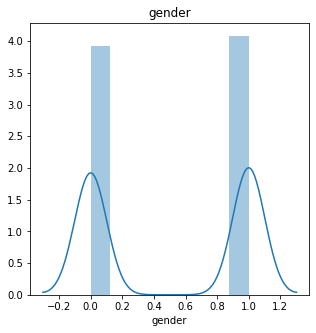

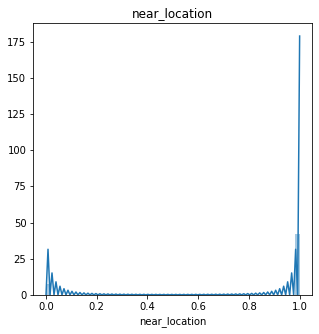

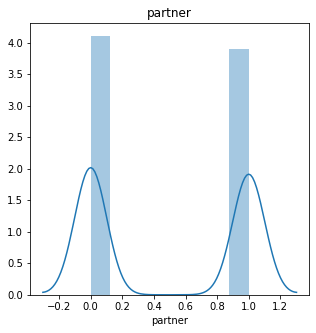

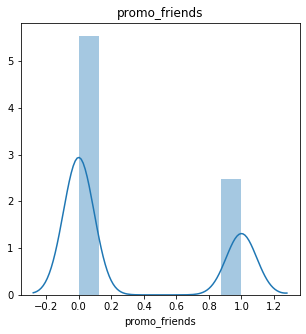

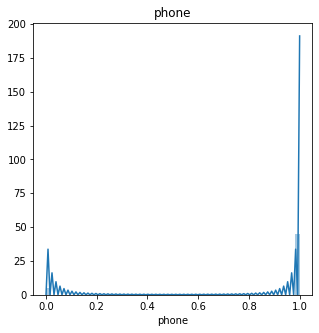

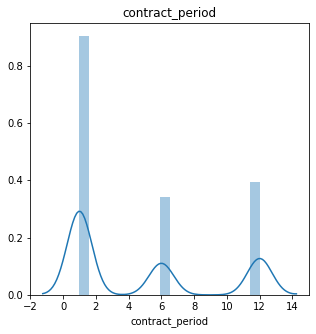

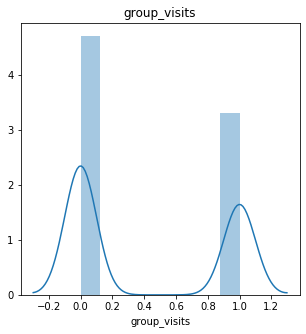

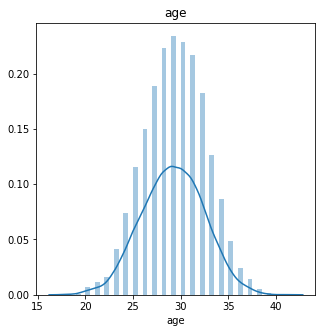

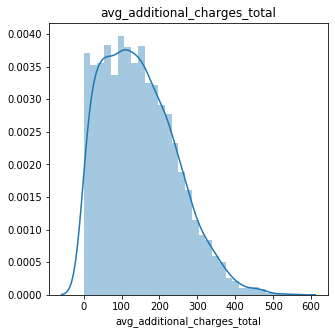

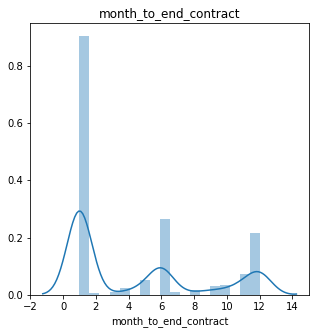

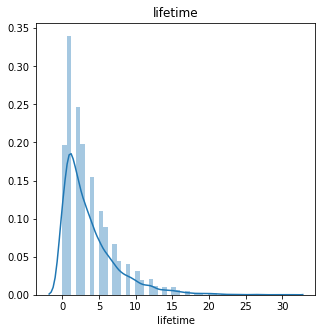

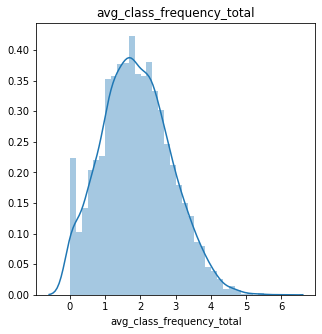

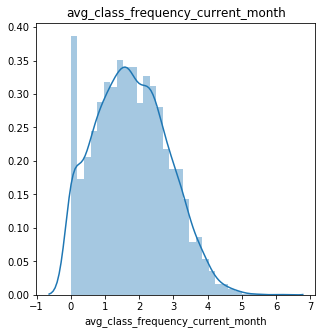

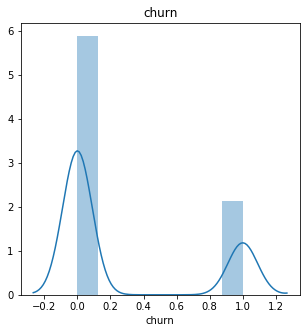

In [8]:
# построим графики оценки распределения признаков 

for column in gc.columns:
    plt.figure(figsize=(5, 5))
    gc.groupby('churn')[column]
    sns.distplot(gc[column])
    plt.title(column)
    plt.show()

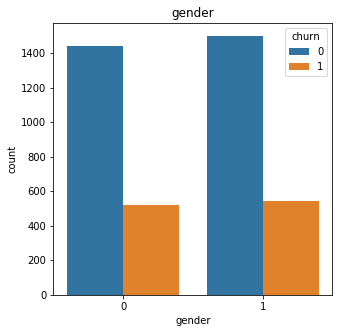

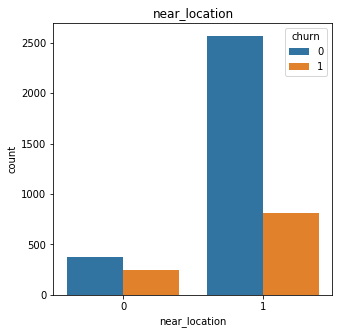

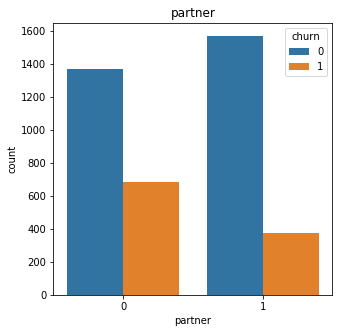

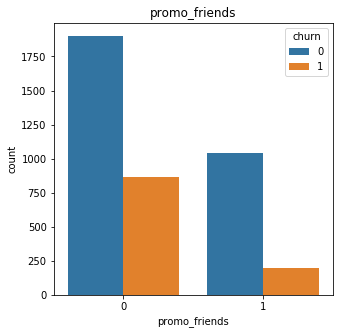

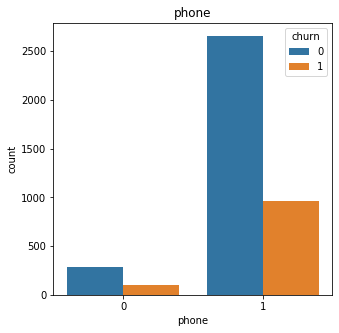

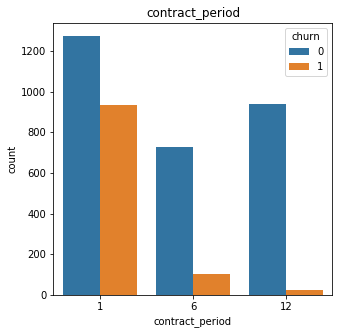

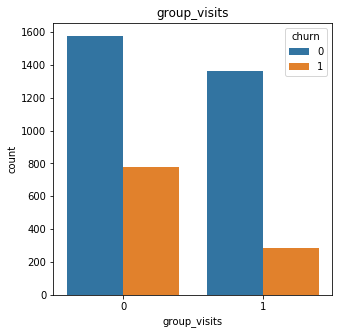

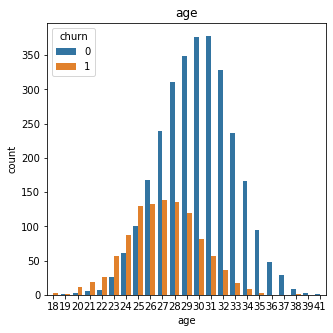

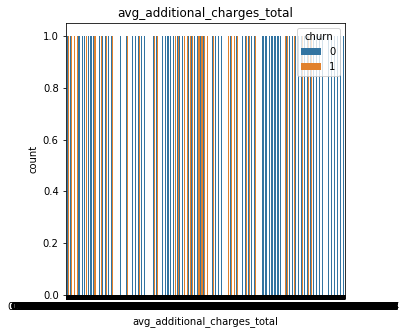

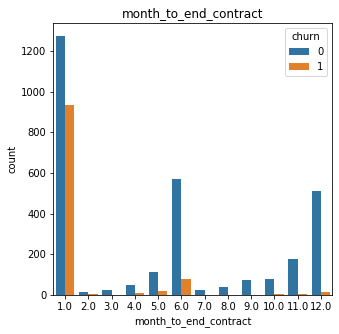

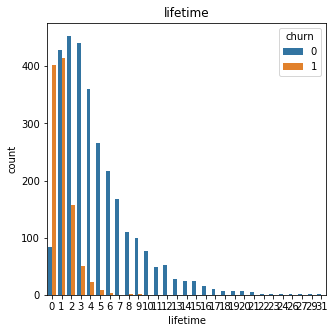

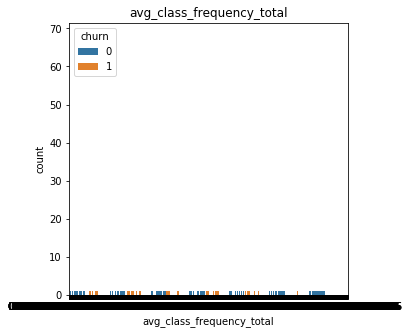

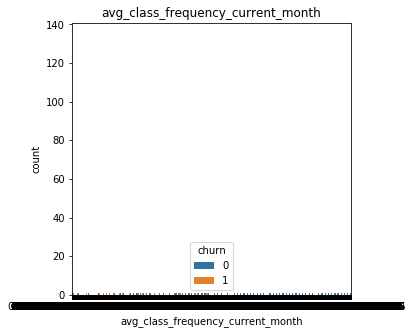

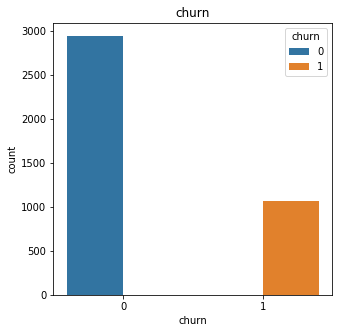

In [9]:
# построим столбчатые гистограммы

for column in gc.columns:
    plt.figure(figsize=(5, 5))
    sns.countplot(x = gc[column], hue='churn', data=gc)
    plt.title(column)
    plt.show()

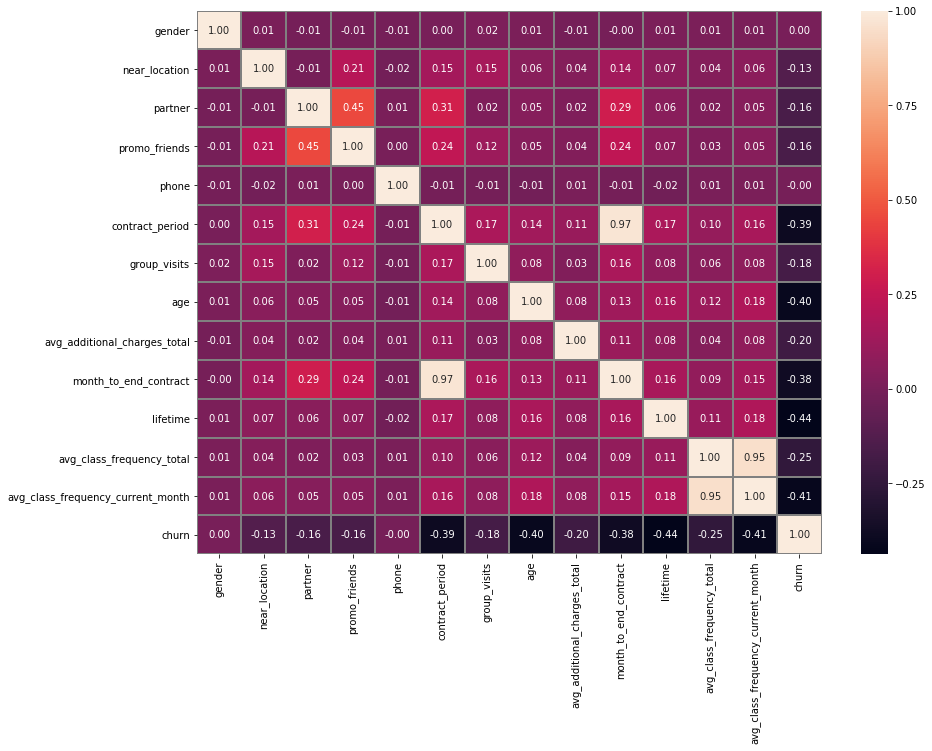

In [10]:
# выведем матрицу корреляций как тепловую карту (строится долго)

cm = gc.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(cm, annot = True, fmt = '.2f', linewidths=1, linecolor='gray')
plt.show()

### Промежуточные выводы

До построения модели мы можем сделать следующие быстрые выводы:
Те у кого длинные контракты уходят реже.
Те, кто чаще занимается уходит реже.
Новички уходят чаще.

У нас есть почти одинаковые признаки - contract_period - month_to_end_contract

А есть признаки с нулевой корреляцией с целевой переменной это признаки 
phone, gender - они похоже никак не влияют на отток.

## Модель прогнозирования оттока клиентов

Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце.

Разделим данные на признаки (матрица X) и целевую переменную (y)

In [11]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = gc.drop('churn', axis = 1)
y = gc['churn']

Разобъем данные на обучающую и валидационную выборку, это необходимо для проверки качества нашей модели

In [12]:
# разделим модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

Обучим модель на train-выборке двумя способами, а именно логистической регрессией и случайным лесом. Посмотрим, какой из способов даст лучшие метрики accuracy, precision и recall.

### Логистическая регрессия

In [13]:
#сделаем функцию расчета и вывода на экран метрик
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

In [14]:
# зададим алгоритм для нашей модели
model = LogisticRegression()

# обучим модель
model.fit(X_train, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
predictions = model.predict(X_test)
probabilities =  model.predict_proba(X_test)[:,1]

In [15]:
# выведем на экран результаты
print_all_metrics(
    y_test,
    predictions,
    probabilities,
    title='Метрики для модели логистической регрессии:',)

Метрики для модели логистической регрессии:
	Accuracy: 0.93
	Precision: 0.89
	Recall: 0.84
	F1: 0.87
	ROC_AUC: 0.98


В целом метрики хорошие!

### Случайный лес

Попробуем пару разных вариантов, например 100 и 300 деревьев

In [16]:
# обучим StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

# Преобразуем обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

# зададим алгоритм для новой модели на основе алгоритма случайного леса (со 100 деревьями)
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) 

# обучим модель случайного леса
rf_model.fit(X_train_st, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st) 
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

In [17]:
# выведем на экран результаты
print_all_metrics(
    y_test,
    rf_predictions,
    rf_probabilities, 
    title='Метрики для модели случайного леса (100 деревьев):'
)

Метрики для модели случайного леса (100 деревьев):
	Accuracy: 0.92
	Precision: 0.88
	Recall: 0.83
	F1: 0.85
	ROC_AUC: 0.97


In [18]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса (со 300 деревьями)
rf2_model = RandomForestClassifier(n_estimators = 300, random_state = 0) 

# обучим модель случайного леса
rf2_model.fit(X_train_st, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf2_predictions = rf2_model.predict(X_test_st) 
rf2_probabilities = rf2_model.predict_proba(X_test_st)[:,1]

In [19]:
# выведем на экран результаты
# выведем на экран результаты
print_all_metrics(
    y_test,
    rf2_predictions,
    rf2_probabilities, 
    title='Метрики для модели случайного леса (300 деревьев):'
)

Метрики для модели случайного леса (300 деревьев):
	Accuracy: 0.93
	Precision: 0.88
	Recall: 0.83
	F1: 0.86
	ROC_AUC: 0.97


Метрики достойные, но метрики логистической регрессии лучше.

### Промежуточные выводы

Для предсказания оттока лучше пользоваться методом лигистической регрессии, метод случайного леса даёт несколько худшие результаты

## Разделение клиентов на кластеры

Проведем кластеризацию для выделения характерных сегментов клиентов. Для этого стандартизируем признаки, построим матрицу расстояний и нарисуем дендрограмму

In [20]:
#подготовим данные, отбросим целевой столбец
gc_sign = gc.drop(['churn'], axis=1)

#выделим список столбцов
gc_columns_list = gc_sign.columns

# проведем обязательную стандартизацию данных перед работой с алгоритмами и подготовим матрицу признаков
sc1 = StandardScaler()
gc_sign_sс = sc1.fit_transform(gc_sign)
gc_sign_sс = pd.DataFrame(gc_sign_sс, columns = gc_columns_list).astype('float64')

In [21]:
# построим матрицу расстояний функцией linkage на стандартизированной матрице признаков
linked = linkage(gc_sign_sс, method = 'ward')

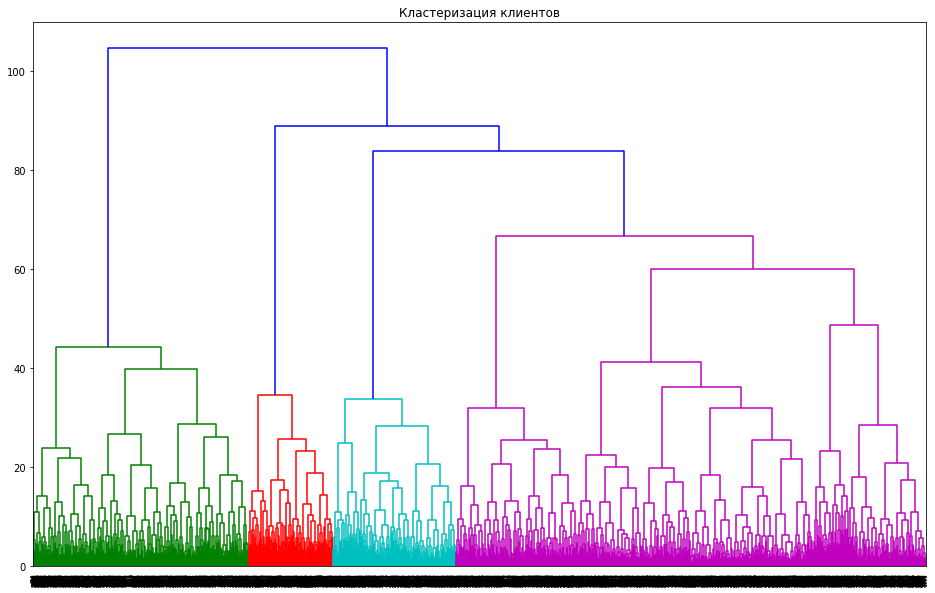

In [22]:
#построим дендрограмму
plt.figure(figsize=(16, 10))  
dendrogram(linked, orientation = 'top')
plt.title('Кластеризация клиентов')
plt.show()

Дендрограмма распределяется на примерно 6 кластеров. При это два из них можно объеденить в один. С целью упрощения договоримся за число кластеров принять 5 и обучим модель кластеризации на основании алгоритма K-Means

In [23]:
# задаём число кластеров, равное 5
km = KMeans(n_clusters = 5, random_state = 42)

# применяем алгоритм к данным и формируем вектор кластеров 
labels = km.fit_predict(gc_sign_sс)

# сохраним в основных данных принадлежность записи к кластеру
gc['cluster'] = labels

Посмотрим, как поделились записи

In [24]:
#проверим размеры кластеров
gc.cluster.value_counts() 

3    1227
1     889
2     865
0     633
4     386
Name: cluster, dtype: int64

Посмотрим средние значения признаков для кластеров, посчитаем долю оттока (методом groupby())и построим графики распределения признаков для кластеров

In [25]:
#посмотрим средние значения для кластеров
gc.groupby('cluster').mean().T

cluster,0,1,2,3,4
gender,0.50,0.55,0.50,0.49,0.52
near_location,0.95,0.85,0.94,0.72,0.86
partner,0.83,0.26,0.74,0.30,0.47
promo_friends,1.00,0.05,0.48,0.02,0.31
phone,1.00,1.00,1.00,1.00,0.00
contract_period,3.10,2.61,11.85,1.91,4.78
group_visits,0.45,0.44,0.55,0.28,0.43
age,29.10,30.01,29.91,28.08,29.30
avg_additional_charges_total,141.77,159.77,163.51,129.50,144.21
month_to_end_contract,2.89,2.42,10.81,1.82,4.47


Похоже у нас выделился самый опасный по части оттока кластер - 3-й. А вот остальные и особенно 2-й вполне себе устойчивы. Видно, что кластер склонный к оттоку значительно меньше занимается в групповых занятиях, сидит на коротких контрактах, заметно меньше тратит на другие услуги фитнесс центра и вообще новички в фитнесе

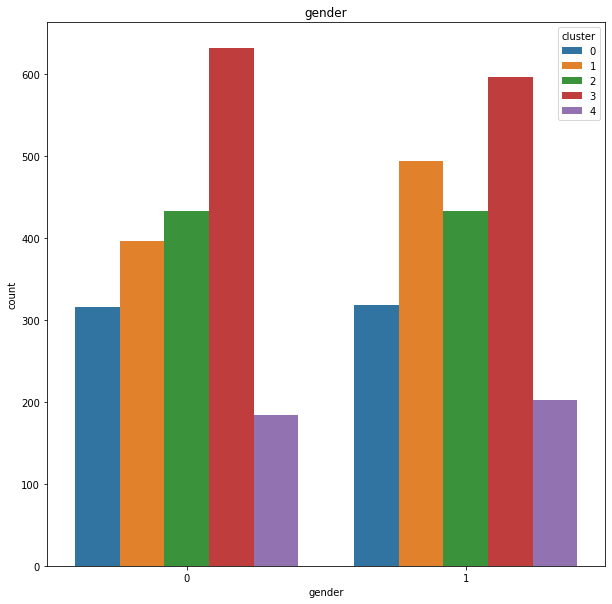

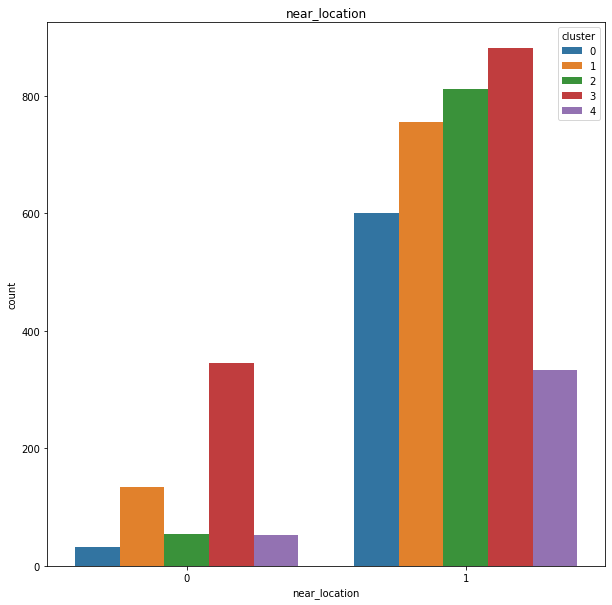

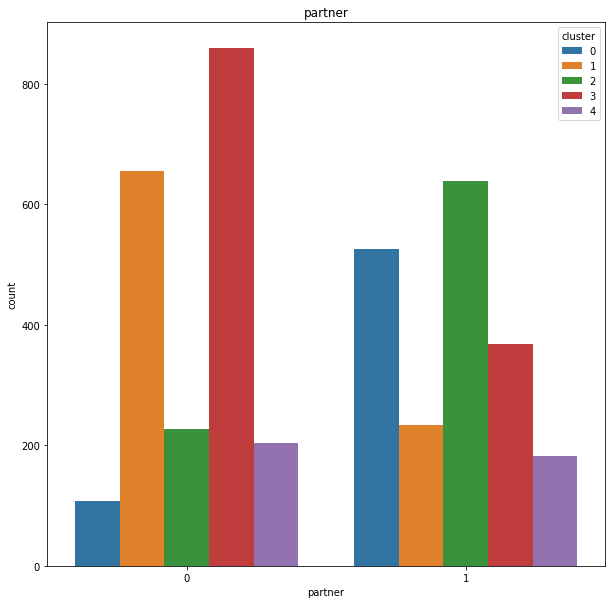

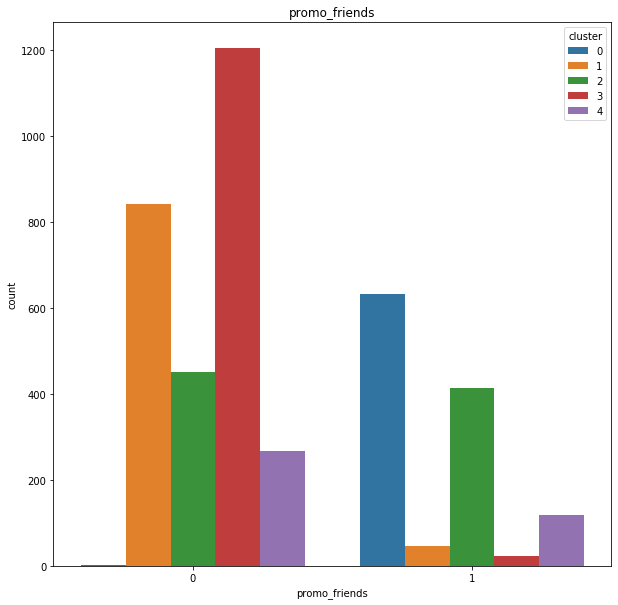

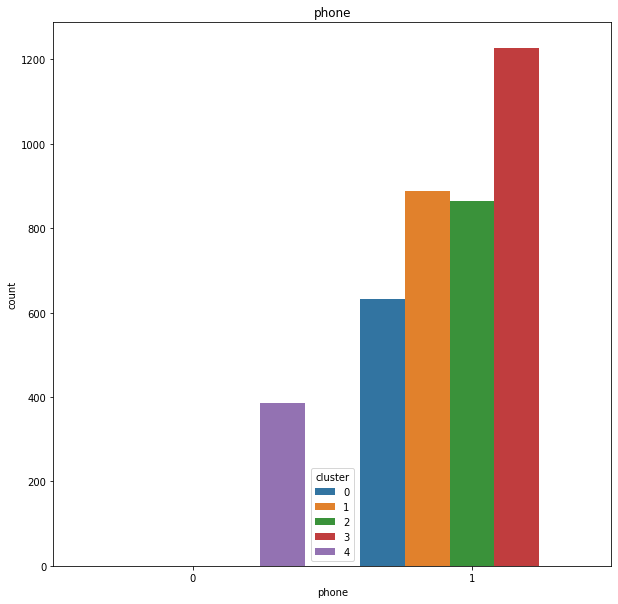

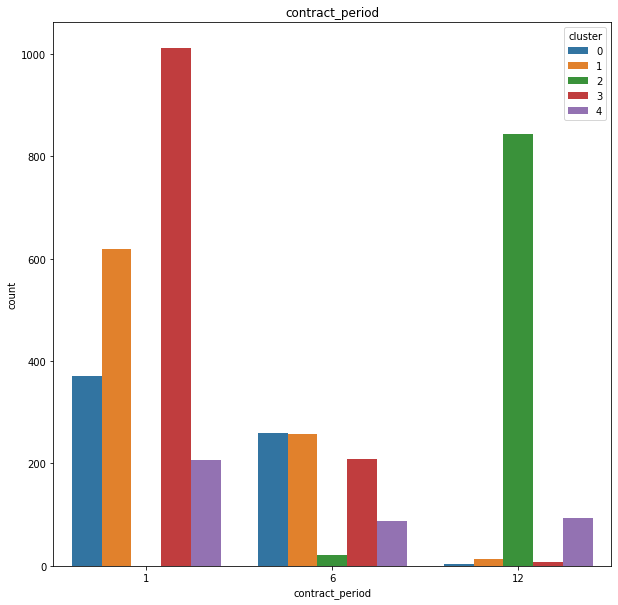

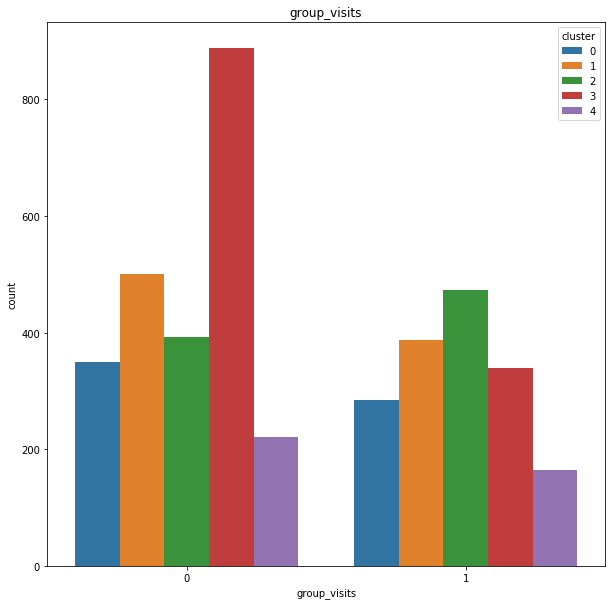

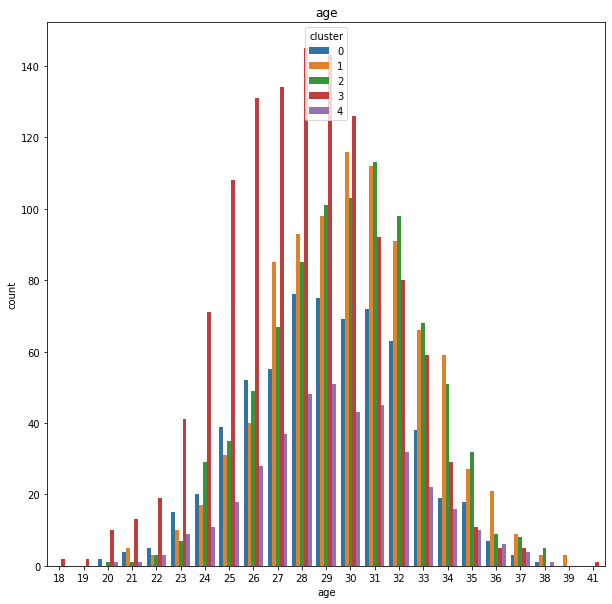

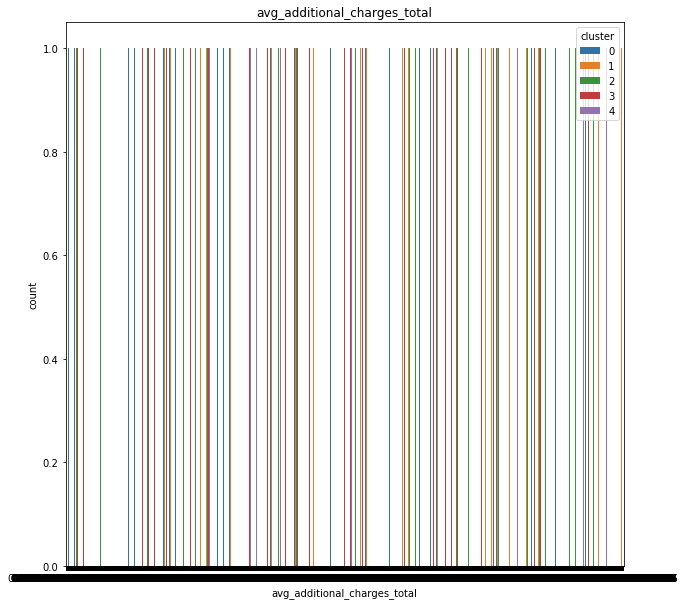

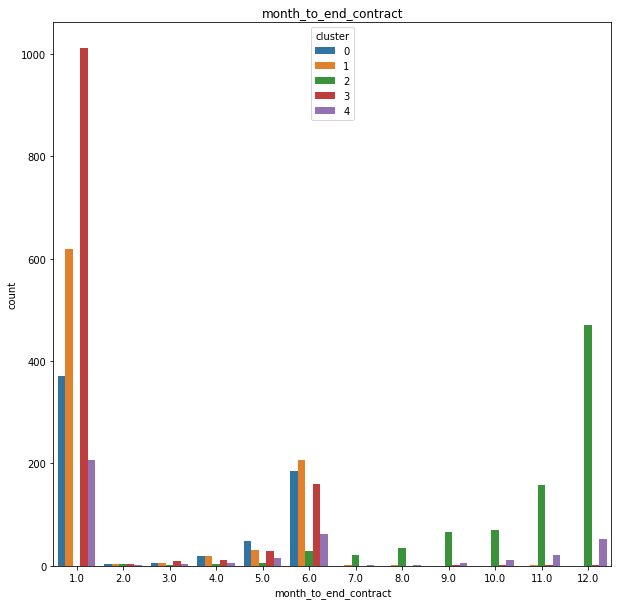

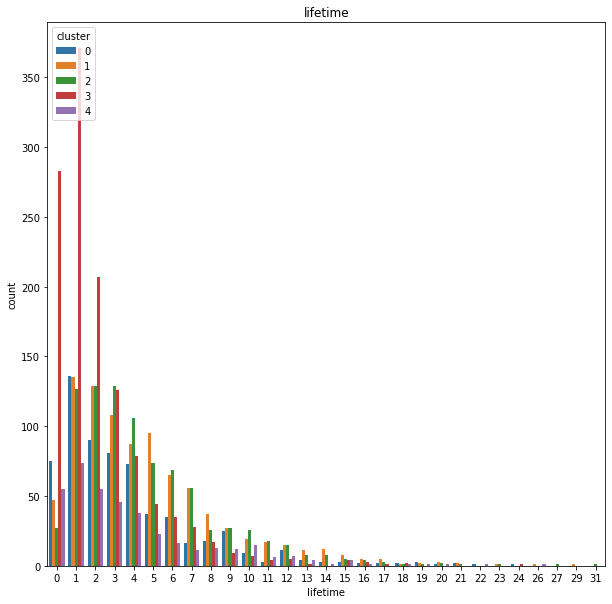

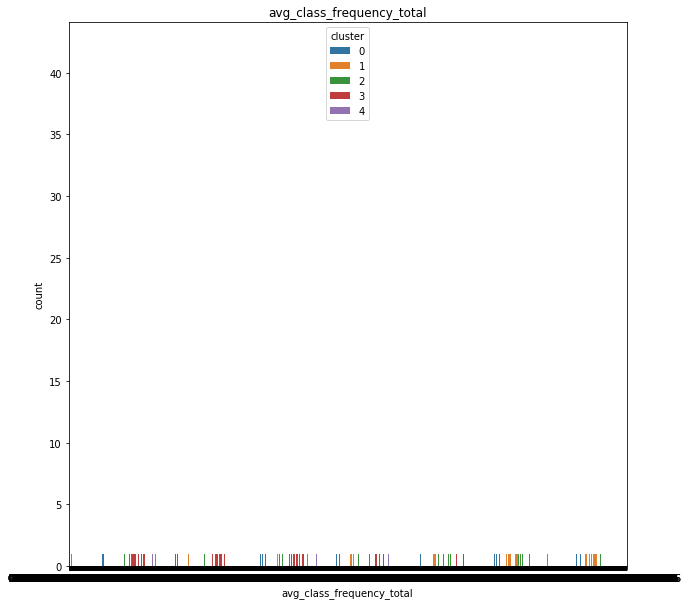

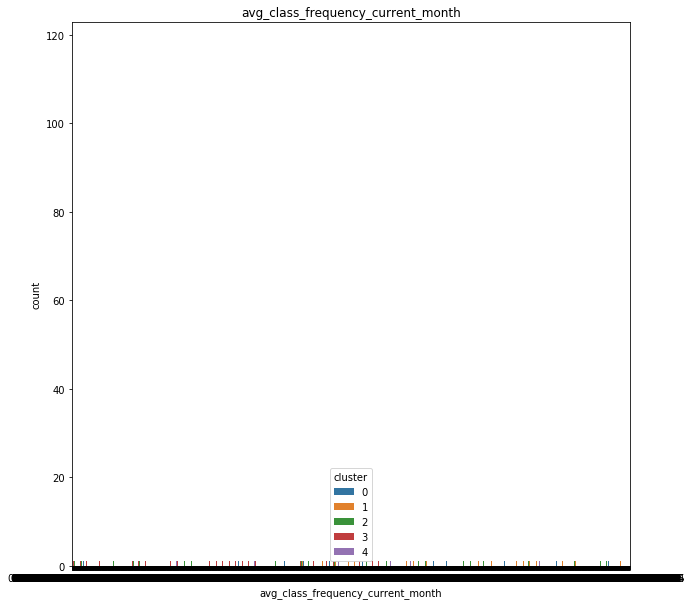

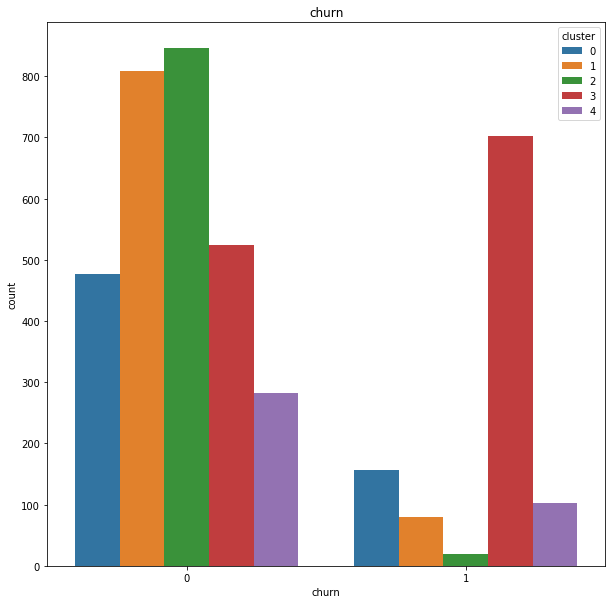

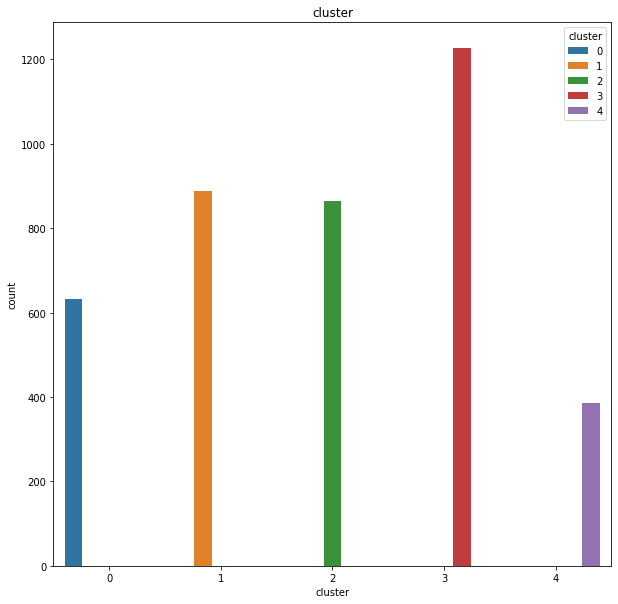

In [26]:
#построим графики распределения признаков

for column in gc.columns: 
    plt.figure(figsize=(10, 10))
    sns.countplot(x = gc[column], hue='cluster', data=gc)
    plt.title(column)
    plt.show()

Что касается кластера 2 (наиболее устойчивого к оттоку) то он характеризуется глубоким участием в жизни клуба и длительными сроками абонемента. 

### Промежуточные выводы

Для предсказания оттока лучше пользоваться методом логистической регрессии, метод случайного леса даёт несколько худшие результаты. Дендрограмма распределяется на примерно 6 кластеров. При это два из них можно объеденить в один. С целью упрощения договоримся за число кластеров принять 5.
Похоже 3-й кластер самый опасный по части оттока. А вот остальные и особенно 2-й вполне себе устойчивы. Видно, что кластер склонный к оттоку значительно меньше занимается в групповых занятиях, сидит на коротких контрактах, заметно меньше тратит на другие услуги фитнесс центра и вообще новички в фитнесе

## Выводы

Мы получили на анализ достаточно чистые данные. Они потребовали небольшой доработки и были подготовлены к анализу.

По результатам исследовательского анализа данных (EDA):

у нас примерное гендерное равенство по посетителям
значительное количество посетителей живет неподалеку от зала
примерно половина клиентов - сотрудники фирм партнеров
треть пришли с друзьями
почти у всех есть в анкете контактные телефоны
в основном покупают короткие контракты
средний возраст посетителей, около 30 лет
метка об уходе у около 26% клиентов.

Видны следующие зависимости оттока:
-похоже сотрудники фирм-партнеров, уходят реже
-так же реже уходят те, кто пришел с друзьями
-заметно реже уходят те, кто часто ходит на групповые занятия и вообще те, кто чаще ходят на занятия ( что в целом логично)
-интересно, что похоже шансы уйти больше у новичков - те кто ходят давно меньше склонны к оттоку.

Далее мы построили модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в слудующем месяце.
Обучили модель на train-выборке двумя способами, а именно логистической регрессией и случайным лесом. По сравнению, лучшие метрики accuracy, precision и recall показал метод логической регрессии.

Мы провели кластеризацию для выделения характерных сегментов клиентов. Дендрограмма распределяется на примерно 6 кластеров. При это два из них можно объеденить в один. С целью упрощения приняли за число кластеров принять 5 и обучили модель кластеризации на основании алгоритма K-Means.

Кластеры распределились неравномерно и позволили выделить более устойчивые и менее устойчивые к оттоку группы клиентов.
Кластеры склонные к оттоку значительно меньше занимаются в групповых занятиях, сидят на коротких абонементах, заметно меньше тратят на другие услуги фитнесс центра и вообще новички в фитнесе. Устойчивые кластеры характеризуются глубоким участием в жизни клуба и длительными сроками абонемента. 

**Рекомендации**
1. Менеджменту клуба рекомендуется уделить больше внимания работе с новичками приходящими в зал. Возможно устроить программу по шефству над новичками со стороны тренеров и персонала фитнессцентра.
2. Возможно стоит больше выделить разницу между краткосрочными и долгосрочными абонементами с целью увеличить долю долгосрочных абонементов.
3. Возможно стоит поработать над разнообразием групповых занятий и возможно над увеличением их достпности.
Работа в этих направлениях позволит уменьшить отток клиентов